
# A. CAR EVALUATION

The dataset was created by M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.) and was derived from a simple hierarchical decision model originally developed for the demonstration of DEX. 
Problem: The model evaluates cars acceptability according to the following concept structure or features. Theses features are subgrouped under intermediate concepts (PRICE, TECH, COMFORT).
Source: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

## Data Set Information

CAR: car acceptability

PRICE : Overall price of the car
  * Buying price of the car
  * Maintenance price for maintenance of the car
 TECH: Technical characteristics of the car
 COMFORT:
  * Number of doors
  * Persons cpacity in terms of persons to carry
  * The size of luggage boot
  * Estimated safety of the car
    
 ## Attribute Information:
 
 Acceptability (Target)
  * acceptable (1), good (2), unacceptable (3)
   
 Features
 * Buying: medium (1), high (2), veryhigh (3)
 * Maint: low (1), medium (2), high (3), veryhigh (4)
 * Doors: 2, 3, 4, 5more
 * Persons: 2, 4, 5
 * lug_booy: small (1), medium (2), big (3)
 * Safety: low (1), medium (2), high (3)
 

In [29]:
import pandas as pd

df_carevaluation = pd.read_excel('CarEvaluation.xlsx')
dummy=df_carevaluation
df_carevaluation

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,ACCEPTABILITY
0,3,4,2,2,1,1,2
1,3,4,2,2,1,2,2
2,3,4,2,2,1,3,2
3,3,4,2,2,2,1,2
4,3,4,2,2,2,2,2
...,...,...,...,...,...,...,...
1194,1,1,2,2,3,1,2
1195,1,1,2,2,3,2,2
1196,1,1,2,2,3,3,2
1197,1,1,2,4,1,1,2


In [30]:
df_features=dummy.drop('ACCEPTABILITY', axis=1)
len(df_features)
df_features.head(8)

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY
0,3,4,2,2,1,1
1,3,4,2,2,1,2
2,3,4,2,2,1,3
3,3,4,2,2,2,1
4,3,4,2,2,2,2
5,3,4,2,2,2,3
6,3,4,2,2,3,1
7,3,4,2,2,3,2


## B. Highlights of results
-A good majority of "good" cars are rated extremely "low" in safety

-A good majority of "good" cars have a small Lug-boot

-A high maintenence price is considered a critical factor for the car being rated as "good"

Population:      0
2  900
1  286
3   13

1.25 * Proportion Chance Criterion: 77.5567247101247%


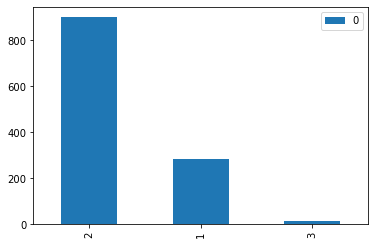

In [31]:
import numpy as np
from collections import Counter
state_counts = Counter(df_carevaluation['ACCEPTABILITY'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
print("Population: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

## C. k_NN Implementation - case:1

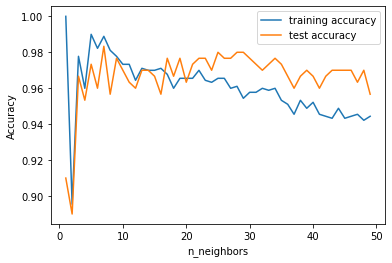

In [32]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=1)
#knn.fit(X_train, y_train)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_carevaluation['ACCEPTABILITY'], 
                                                    test_size=0.25,random_state=42)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

for n_neighbors in neighbors_settings:   
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

## C. k_NN Implementation - case:2

In [33]:
import statistics
l_training = pd.DataFrame()
l_test = pd.DataFrame()
Train_l = []
Test_l = []
for seedN in range(1,50,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_carevaluation['ACCEPTABILITY'], 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    l_training[seedN]=training_accuracy
    l_test[seedN] = test_accuracy
    Train_l.append(statistics.mean(training_accuracy))
    Test_l.append(statistics.mean(test_accuracy))

print(max(Test_l))

0.9700680272108844


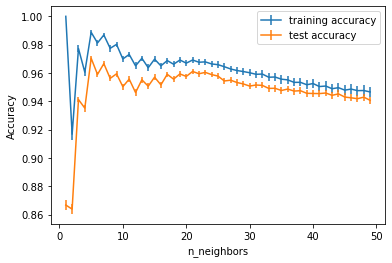

In [34]:
plt.errorbar(neighbors_settings, l_training.mean(axis=1),
             yerr=l_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, l_test.mean(axis=1),
             yerr=l_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## D. Discussion of Results

-The maximum accuracy from the test set is 97% observed within a range of 6 - 7 n_neighbors values. If used within that range, the model can make accurate predictions 97% of the time.
   
-The classifier is considered successful since test set accuracy is greater than its PCC of 77.6%. 

-Post n_neighbours = 20, the accuracy for test results stays constant at around 94.5%. However, that is the result of underfitting. Similarly, prior to n_neighbours = 6, the Training set accuracy is 100%, which is obviously the case of overfitting.


### Logistics Regression L2

In [35]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn #library provided by amueller
import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.2g}'.format

In [40]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_features,df_carevaluation['ACCEPTABILITY'], 
#                                                    test_size=0.25,random_state=42)
#Separate Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(df_features, df_carevaluation.ACCEPTABILITY, stratify=df_carevaluation.ACCEPTABILITY, random_state=42)

#Fit using Logistic Regression with C=10
logisticregression = LogisticRegression(C=10000, max_iter=10000).fit(X_train, y_train) 
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

training set score: 0.895439
test set score: 0.900000


In [41]:
logisticregression100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
logisticregression10 = LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)
logisticregression1 = LogisticRegression(C=1, max_iter=10000).fit(X_train, y_train)
logisticregression01 = LogisticRegression(C=.01, max_iter=10000).fit(X_train, y_train)
logisticregression001 = LogisticRegression(C=.001, max_iter=10000).fit(X_train, y_train)

#print("C =10, training set score: %f" % logisticregression10.score(X_train, y_train))
print("C =.001, train set score: %f" % logisticregression001.score(X_train, y_train))
print("C =.001, test set score: %f \n" % logisticregression001.score(X_test, y_test))

print("C =.01, train set score: %f" % logisticregression01.score(X_train, y_train))
print("C =.01, test set score: %f \n" % logisticregression01.score(X_test, y_test))

print("C =1, train set score: %f" % logisticregression1.score(X_train, y_train))
print("C =1, test set score: %f \n" % logisticregression1.score(X_test, y_test))

print("C =10, train set score: %f" % logisticregression10.score(X_train, y_train))
print("C =10, test set score: %f \n" % logisticregression10.score(X_test, y_test))

print("C =100, train set score: %f" % logisticregression100.score(X_train, y_train))
print("C =100, test set score: %f" % logisticregression100.score(X_test, y_test))

C =.001, train set score: 0.750834
C =.001, test set score: 0.750000 

C =.01, train set score: 0.862069
C =.01, test set score: 0.836667 

C =1, train set score: 0.886541
C =1, test set score: 0.890000 

C =10, train set score: 0.895439
C =10, test set score: 0.900000 

C =100, train set score: 0.896552
C =100, test set score: 0.900000


In [48]:
logisticregression01 = LogisticRegression(C=100,  max_iter=10000).fit(X_train, y_train)
print("training set score: %f" % logisticregression001.score(X_train, y_train))
print("test set score: %f" % logisticregression001.score(X_test, y_test))


training set score: 0.750834
test set score: 0.750000


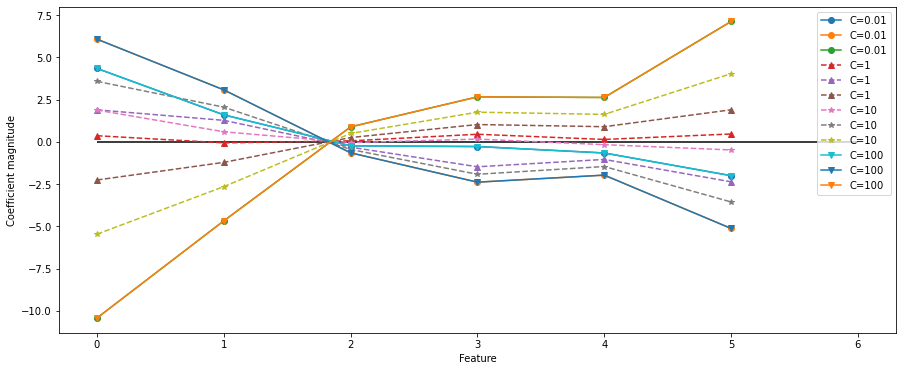

In [53]:
fig = plt.figure(figsize=(15, 6))
#plt.plot(logisticregression001.coef_.T, '-', label="C=0.001")
plt.plot(logisticregression01.coef_.T, '-o', label="C=0.01")
plt.plot(logisticregression1.coef_.T, '--^', label="C=1")
plt.plot(logisticregression10.coef_.T, '--*', label="C=10")
plt.plot(logisticregression100.coef_.T, '-v', label="C=100")
#plt.xticks(range(df_features.shape[1]), df_features.feature_names, rotation=90)
plt.hlines(0,0, df_features.shape[1])
#plt.ylim(-1, 1)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [51]:
print("Weight of the top predictor = %f" %np.amax(logisticregression10.coef_.T))
#print("Top Predictor = %s" %cancer.feature_names[np.argmax(logisticregression10.coef_.T)])

Weight of the top predictor = 4.036693


In [54]:
No_trials = 20

all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_carevaluation['ACCEPTABILITY'],
                                                        test_size=0.25, random_state=seedN)
#X_train, X_test, y_train, y_test = train_test_split(df_features,df_carevaluation['ACCEPTABILITY'], 
#                                                    test_size=0.25,random_state=42)    
    training_accuracy = []
    test_accuracy = []
    
    C = [1e-8,1e-5, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300]

    for alpha_run in C:
        lr_l2 = LogisticRegression(C=alpha_run).fit(X_train, y_train)
        training_accuracy.append(lr_l2.score(X_train, y_train))
        test_accuracy.append(lr_l2.score(X_test, y_test))
        #print(alpha_run)
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.893684
Best C Parameter = 10.000000


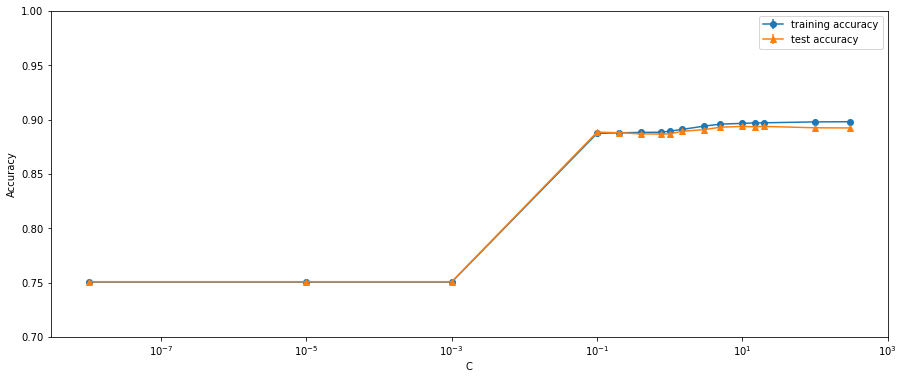

In [55]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, all_training.mean(axis=1),
             yerr=all_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, all_test.mean(axis=1), marker='^',
             yerr=5*all_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(all_test.mean(axis=1))])

In [56]:
lr_l2 = LogisticRegression(C=C[np.argmax(all_test.mean(axis=1))]).fit(X_train, y_train)

print("Top Predictor = %s" %cancer.feature_names[np.argmax(lr_l2.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(lr_l2 .coef_.T))


Top Predictor = mean texture
Top Predictor Weight of ML with highest prediction = 3.777922


### Logistics Regression L1

train accuracy of L1 logreg with C=0.010000: 0.756396
test accuracy of L1 logreg with C=0.010000: 0.733333 

train accuracy of L1 logreg with C=0.100000: 0.875417
test accuracy of L1 logreg with C=0.100000: 0.880000 

train accuracy of L1 logreg with C=1.000000: 0.883204
test accuracy of L1 logreg with C=1.000000: 0.903333 

train accuracy of L1 logreg with C=100.000000: 0.889878
test accuracy of L1 logreg with C=100.000000: 0.916667 



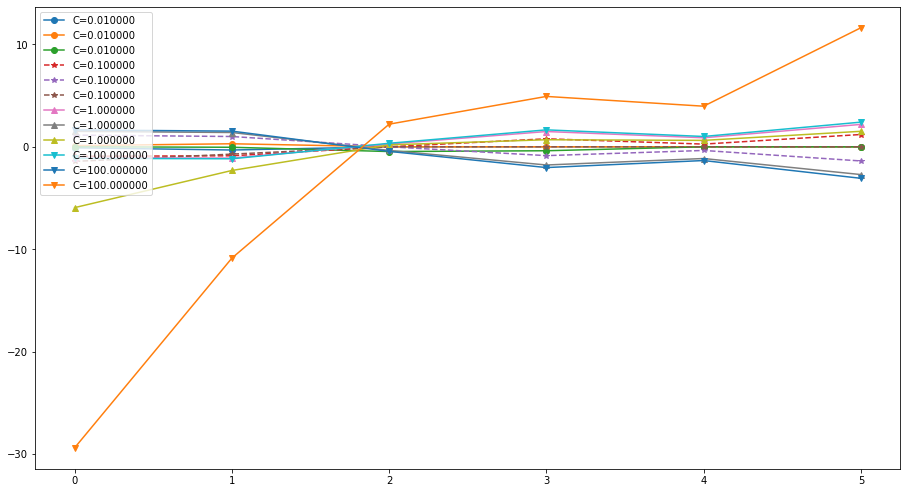

In [58]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.01,.1, 1, 100],['-o','--*','-^','-v','--o']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("train accuracy of L1 logreg with C=%f: %f"
    % (C, lr_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f \n"
    % (C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C=%f" % C)

#plt.xticks(range(df_carevaluation.data.shape[1]), df_carevaluation.feature_names, rotation=90)
#plt.ylim(-1, 1)
plt.legend(loc=2)

In [60]:
logisticregression100 = LogisticRegression(C=100, penalty="l1", solver='liblinear').fit(X_train, y_train)
print("Top Predictor Weight = %f" %np.amax(logisticregression100.coef_.T))
#print("Top Predictor = %s" %cancer.feature_names[np.argmax(logisticregression100.coef_.T)])

Top Predictor Weight = 11.662776


In [61]:
No_trials = 20

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_carevaluation['ACCEPTABILITY'],
                                                        test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    
    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        
        lr_l1 = LogisticRegression(C=alpha_run, penalty="l1", solver='liblinear').fit(X_train, y_train)
        training_accuracy.append(lr_l1.score(X_train, y_train))
        test_accuracy.append(lr_l1.score(X_test, y_test))
            
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.892456
Best C Parameter = 1000.000000


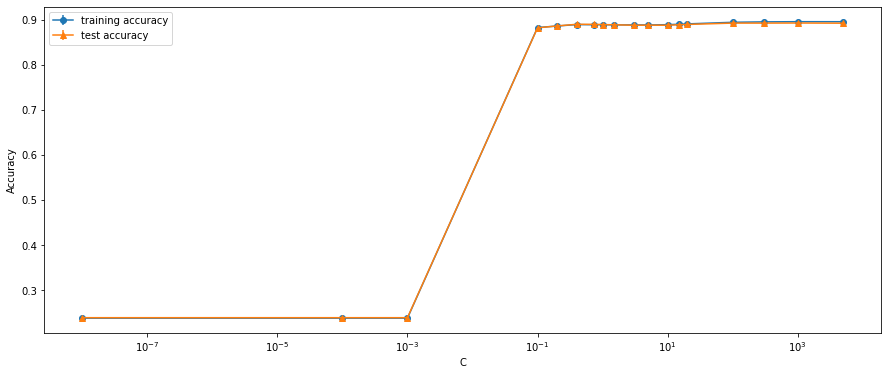

In [62]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.9,1)
plt.legend()
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [63]:
lr_l1 = LogisticRegression(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l1", solver='liblinear').fit(X_train, y_train)

print("Top Predictor = %s" %cancer.feature_names[np.argmax(lr_l1.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(lr_l1 .coef_.T))


Top Predictor = concave points error
Top Predictor Weight of ML with highest prediction = 14.803802


### SVM L2

In [64]:
No_trials =20

from sklearn.svm import LinearSVC

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_carevaluation['ACCEPTABILITY'],
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []
  
    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        svm_l2 = LinearSVC(C=alpha_run, penalty="l2").fit(X_train, y_train)
        training_accuracy.append(svm_l2.score(X_train, y_train))
        test_accuracy.append(svm_l2.score(X_test, y_test))
     
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.889825
Best C Parameter = 0.400000


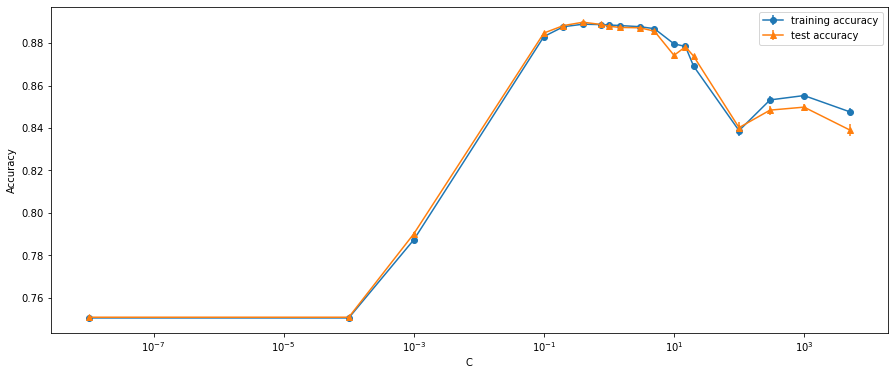

In [65]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [71]:
svm_l2 = LinearSVC(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l2").fit(X_train, y_train)

#print("Top Predictor = %s" %cancer.feature_names[np.argmax(svm_l2.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(svm_l2 .coef_.T))


Top Predictor Weight of ML with highest prediction = 2.157946


train accuracy of L2 logreg with C=0.000100: 0.756396
test accuracy of L2 logreg with C=0.000100: 0.733333 

train accuracy of L2 logreg with C=0.010000: 0.847608
test accuracy of L2 logreg with C=0.010000: 0.866667 

train accuracy of L2 logreg with C=1.000000: 0.884316
test accuracy of L2 logreg with C=1.000000: 0.896667 

train accuracy of L2 logreg with C=100.000000: 0.843159
test accuracy of L2 logreg with C=100.000000: 0.863333 

Top Predictor Value= 0.437343
Top Predictor = mean texture


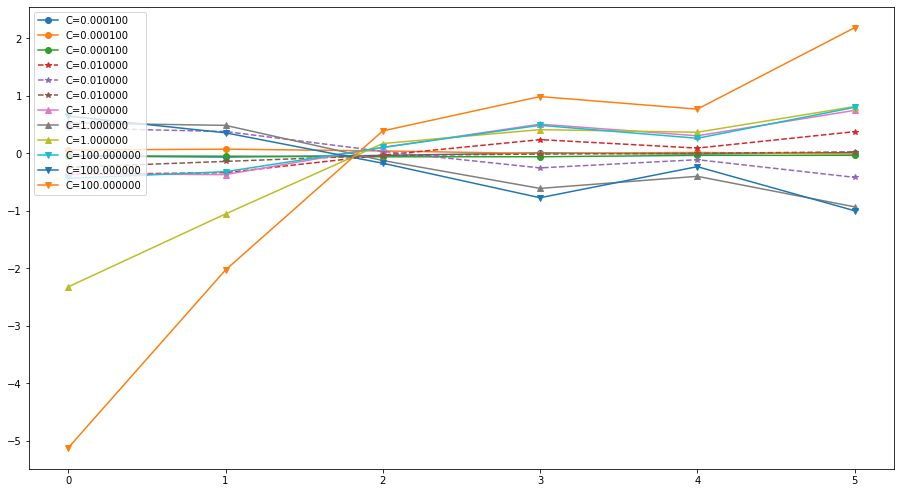

In [67]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.0001,.01, 1, 100],['-o','--*','-^','-v']):
    lsvc_l2 = LinearSVC(C=C, penalty="l2").fit(X_train, y_train)
    print("train accuracy of L2 logreg with C=%f: %f"
    % (C, lsvc_l2.score(X_train, y_train)))
    print("test accuracy of L2 logreg with C=%f: %f \n"
    % (C, lsvc_l2.score(X_test, y_test)))
    plt.plot(lsvc_l2.coef_.T, marker, label="C=%f" % C)

#plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
#plt.ylim(-1, 1)
plt.legend(loc=2)

linearSVC01 = LinearSVC(C=.01, penalty="l2").fit(X_train, y_train)
print("Top Predictor Value= %f" %np.amax(linearSVC01.coef_.T))
print("Top Predictor = %s" %cancer.feature_names[np.argmax(linearSVC01.coef_.T)])

### SVM L1

In [68]:
No_trials=20

from sklearn.svm import LinearSVC

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_carevaluation['ACCEPTABILITY'],
                                                        test_size=0.25, random_state=seedN)
    
    #X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
    training_accuracy = []
    test_accuracy = []
    #neighbors_settings = range(1, 100) # try n_neighbors from 1 to 50

    C = [1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:

        svm_l1 = LinearSVC(C=alpha_run, penalty="l1", loss='squared_hinge', dual=False).fit(X_train, y_train)
        training_accuracy.append(svm_l1.score(X_train, y_train))
        test_accuracy.append(svm_l1.score(X_test, y_test))

    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.890351
Best C Parameter = 300.000000


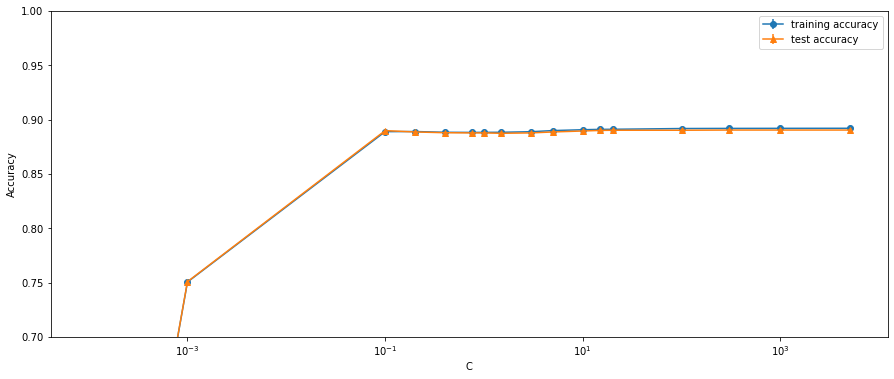

In [69]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [70]:
svm_l1 = LinearSVC(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l1", loss='squared_hinge', dual=False).fit(X_train, y_train)

#print("Top Predictor = %s" %cancer.feature_names[np.argmax(svm_l1.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(svm_l1 .coef_.T))


Top Predictor Weight of ML with highest prediction = 2.755968


training accuracy of L1 logreg with C=0.000010: 0.233593
test accuracy of L1 logreg with C=0.000010: 0.253333 

training accuracy of L1 logreg with C=0.010000: 0.809789
test accuracy of L1 logreg with C=0.010000: 0.826667 

training accuracy of L1 logreg with C=1.000000: 0.885428
test accuracy of L1 logreg with C=1.000000: 0.906667 

training accuracy of L1 logreg with C=10.000000: 0.887653
test accuracy of L1 logreg with C=10.000000: 0.913333 

training accuracy of L1 logreg with C=100.000000: 0.889878
test accuracy of L1 logreg with C=100.000000: 0.913333 

Top Predictor weight = 0.353130
Top Predictor = mean texture


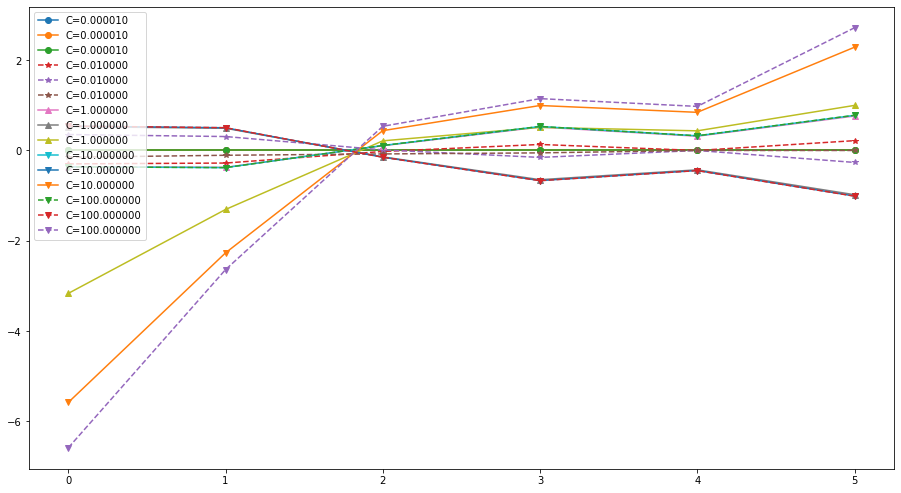

In [72]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.00001,.01, 1, 10, 100],['-o','--*','-^','-v', '--v']):
    lsvc_l1 = LinearSVC(C=C, penalty="l1",loss='squared_hinge', dual=False).fit(X_train, y_train)
    print("training accuracy of L1 logreg with C=%f: %f"
    % (C, lsvc_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f \n"
    % (C, lsvc_l1.score(X_test, y_test)))
    plt.plot(lsvc_l1.coef_.T, marker, label="C=%f" % C)

#plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
#plt.ylim(-.5, .5)
plt.legend(loc=2)

linearSVC01 = LinearSVC(C=.01, penalty="l1",dual=False).fit(X_train, y_train)
print("Top Predictor weight = %f" %np.amax(linearSVC01.coef_.T))
print("Top Predictor = %s" %cancer.feature_names[np.argmax(linearSVC01.coef_.T)])
